In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, vertical_flip = True, zoom_range = 0.2)

In [3]:
x_train = train_datagen.flow_from_directory(r"C:\Users\samjo\Jupyder\flowers", target_size = (64,64) , class_mode = "categorical", batch_size = 100)

Found 4317 images belonging to 5 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [5]:
model = Sequential()

In [6]:
model.add(Convolution2D(32, (3,3), activation = "relu", input_shape = (64,64,3) ))

In [7]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [8]:
model.add(Flatten())

In [9]:
model.add(Dense(300, activation = "relu"))

In [10]:
model.add(Dense(150, activation = "relu")) #mulitple dense layers

In [11]:
model.add(Dense(5, activation = "softmax")) #output layer

In [12]:
model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = "adam")

In [13]:
len(x_train)

44

In [14]:
model.fit(x_train, epochs = 15, steps_per_epoch = len(x_train))

Epoch 1/15
44/44 [==============================] - 55s 1s/step - loss: 1.4431 - accuracy: 0.3880
Epoch 2/15
44/44 [==============================] - 53s 1s/step - loss: 1.0914 - accuracy: 0.5580
Epoch 3/15
44/44 [==============================] - 52s 1s/step - loss: 1.0293 - accuracy: 0.5942
Epoch 4/15
44/44 [==============================] - 51s 1s/step - loss: 0.9781 - accuracy: 0.6192
Epoch 5/15
44/44 [==============================] - 31s 696ms/step - loss: 0.9435 - accuracy: 0.6282
Epoch 6/15
44/44 [==============================] - 18s 402ms/step - loss: 0.8956 - accuracy: 0.6505
Epoch 7/15
44/44 [==============================] - 17s 391ms/step - loss: 0.8709 - accuracy: 0.6565
Epoch 8/15
44/44 [==============================] - 17s 380ms/step - loss: 0.8384 - accuracy: 0.6729
Epoch 9/15
44/44 [==============================] - 17s 392ms/step - loss: 0.7909 - accuracy: 0.6912
Epoch 10/15
44/44 [==============================] - 17s 381ms/step - loss: 0.7761 - accuracy: 0.6947
E

In [15]:
model.save("flowers.h5")

In [16]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [17]:
model = load_model("flowers.h5")

In [18]:
img = image.load_img("F:\\sunflor.jpg" , target_size = (64,64)) 

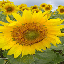

In [19]:
img

In [20]:
x = image.img_to_array(img)

In [21]:
x.ndim

3

In [22]:
x = np.expand_dims(x,axis = 0)

In [23]:
x.ndim

4

In [24]:
pred = model.predict(x)

1/1 [==============================] - 0s 101ms/step


In [25]:
pred

array([[0., 0., 0., 1., 0.]], dtype=float32)

In [26]:
labels = ['daisy','dandelion','roses','sunflowers','tulips']

In [27]:
labels[np.argmax(pred)]

'sunflowers'